In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

RANDOM_SEED = 42
tf.keras.utils.set_random_seed(RANDOM_SEED)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/test.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/test.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/train/train.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/dev.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/test.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/dev.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/train.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/test.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/train/train.txt
/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/dev.csv
/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/test.txt
/kaggle/input/pubmed-200k-rtc/PubMed_20k_

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-6fa65799-3694-3e04-5f93-1eabb21e1ec7)
GPU 1: Tesla T4 (UUID: GPU-62dcc30b-51d3-8a65-7b26-0a12427be94a)


# 1] Data Ingestion

In [3]:
TRAIN_CSV_FILE_LOCATION = '/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/train.csv'
VAL_CSV_FILE_LOCATION = '/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/dev.csv'
TEST_CSV_FILE_LOCATION = '/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/test.csv'

In [4]:
train_df = pd.read_csv(TRAIN_CSV_FILE_LOCATION)
train_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24293578,24293578_0_12,To investigate the efficacy of 6 weeks of dail...,0,12,OBJECTIVE
1,24293578,24293578_1_12,A total of 125 patients with primary knee OA w...,1,12,METHODS
2,24293578,24293578_2_12,Outcome measures included pain reduction and i...,2,12,METHODS
3,24293578,24293578_3_12,Pain was assessed using the visual analog pain...,3,12,METHODS
4,24293578,24293578_4_12,Secondary outcome measures included the Wester...,4,12,METHODS


In [5]:
val_df = pd.read_csv(VAL_CSV_FILE_LOCATION)
val_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24290286,24290286_0_10,IgE sensitization to Aspergillus fumigatus and...,0,10,BACKGROUND
1,24290286,24290286_1_10,It is not clear whether these patients would b...,1,10,BACKGROUND
2,24290286,24290286_2_10,We sought to determine whether a 3-month cours...,2,10,OBJECTIVE
3,24290286,24290286_3_10,Asthmatic patients who were IgE sensitized to ...,3,10,METHODS
4,24290286,24290286_4_10,Primary outcomes were improvement in quality o...,4,10,METHODS


In [6]:
test_df = pd.read_csv(TEST_CSV_FILE_LOCATION)
test_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24845963,24845963_0_9,This study analyzed liver function abnormaliti...,0,9,BACKGROUND
1,24845963,24845963_1_9,A post hoc analysis was conducted with the use...,1,9,RESULTS
2,24845963,24845963_2_9,Liver function tests ( LFTs ) were measured at...,2,9,RESULTS
3,24845963,24845963_3_9,Survival analyses were used to assess the asso...,3,9,RESULTS
4,24845963,24845963_4_9,The percentage of patients with abnormal LFTs ...,4,9,RESULTS


# 2] Exploratory Data Analysis

## 2/a] The Train Set

In [7]:
train_df.shape

(180040, 6)

In [8]:
CLASSES = ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']
CLASSES

['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']

In [9]:
train_tally = train_df['target'].value_counts()
train_tally

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

METHODS        0.329666
RESULTS        0.321890
CONCLUSIONS    0.150900
BACKGROUND     0.120679
OBJECTIVE      0.076866
Name: target, dtype: float64

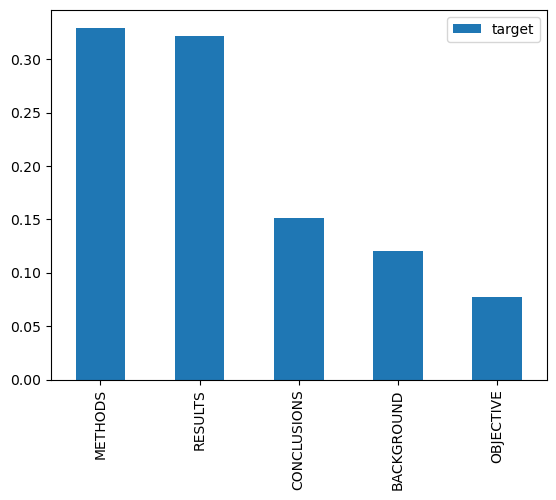

In [10]:
pd.DataFrame(train_tally/sum(train_tally)).plot(kind='bar')
norm_train_tally = train_tally/sum(train_tally)
norm_train_tally

📘 **NOTES**
* There are `5` classes for this dataset.
* There are `180040` records for the train set. Note that each record is a line on the medical abstract.
* This is an *imbalanced* dataset with `2` of the classes comprising `~30%`of the dataset. The least class comprises `~7%` of the dataset.

## 2/b] The Validation Set

In [11]:
val_df.shape

(30212, 6)

In [12]:
val_tally = val_df['target'].value_counts()
val_tally

METHODS        9964
RESULTS        9841
CONCLUSIONS    4582
BACKGROUND     3449
OBJECTIVE      2376
Name: target, dtype: int64

METHODS        0.329803
RESULTS        0.325731
CONCLUSIONS    0.151662
BACKGROUND     0.114160
OBJECTIVE      0.078644
Name: target, dtype: float64

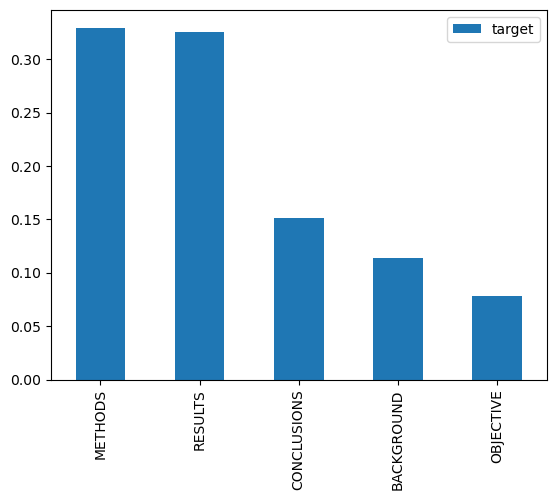

In [13]:
pd.DataFrame(val_tally/sum(val_tally)).plot(kind='bar')
norm_val_tally = val_tally/sum(val_tally)
norm_val_tally

## 2/c] The Test Set

In [14]:
test_df.shape

(30135, 6)

In [15]:
test_tally = test_df['target'].value_counts()
test_tally

METHODS        9897
RESULTS        9713
CONCLUSIONS    4571
BACKGROUND     3621
OBJECTIVE      2333
Name: target, dtype: int64

METHODS        0.328422
RESULTS        0.322316
CONCLUSIONS    0.151684
BACKGROUND     0.120159
OBJECTIVE      0.077418
Name: target, dtype: float64

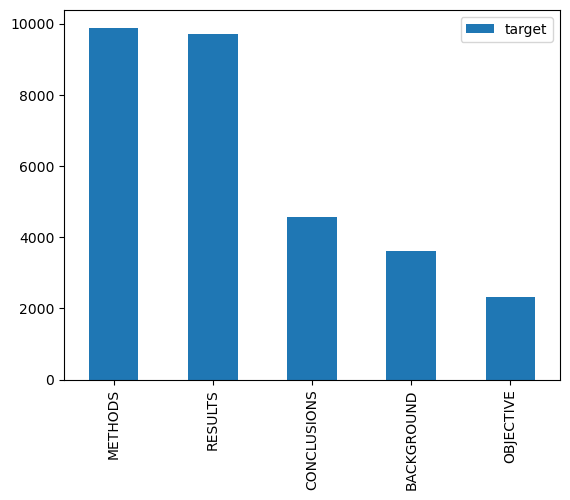

In [16]:
pd.DataFrame(test_tally).plot(kind='bar')
norm_test_tally = test_tally/sum(test_tally)
norm_test_tally

## 2/d] Compare class distributions of the different datasets

<Axes: >

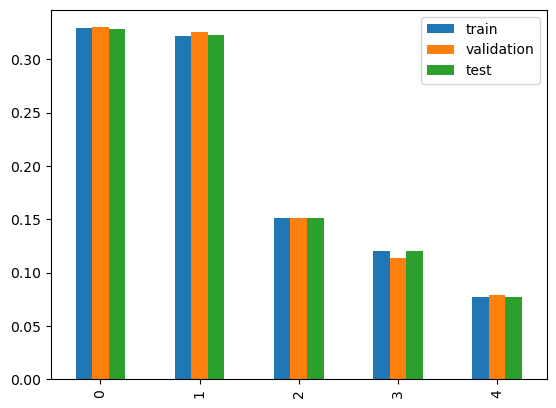

In [17]:
pd.DataFrame(zip(norm_train_tally, norm_val_tally, norm_test_tally), columns=['train', 'validation','test']).plot(kind='bar')

📘 **NOTES**
* The distribution ofthe classes between `train`, `validation`, and `test` sets are quite similar. Nice stratification!


# 3] Modelling

* **Model 0 (baseline):** Multinomial Naive Bayes

## 3/a] Preprocessing the dataset

In [18]:
def features_class_split(dataset):
    return dataset['abstract_text'], dataset['target']

In [19]:
X_train, y_train = features_class_split(train_df)
X_train.shape, y_train.shape

((180040,), (180040,))

In [20]:
X_train

0         To investigate the efficacy of 6 weeks of dail...
1         A total of 125 patients with primary knee OA w...
2         Outcome measures included pain reduction and i...
3         Pain was assessed using the visual analog pain...
4         Secondary outcome measures included the Wester...
                                ...                        
180035    For the absolute change in percent atheroma vo...
180036    For PAV , a significantly greater percentage o...
180037    Both strategies had acceptable side effect pro...
180038    Compared with standard statin monotherapy , th...
180039    ( Plaque Regression With Cholesterol Absorptio...
Name: abstract_text, Length: 180040, dtype: object

In [21]:
y_train

0           OBJECTIVE
1             METHODS
2             METHODS
3             METHODS
4             METHODS
             ...     
180035        RESULTS
180036        RESULTS
180037        RESULTS
180038    CONCLUSIONS
180039    CONCLUSIONS
Name: target, Length: 180040, dtype: object

In [22]:
X_val, y_val = features_class_split(val_df)
X_val.shape, y_val.shape

((30212,), (30212,))

In [23]:
X_test, y_test = features_class_split(test_df)
X_test.shape, y_test.shape

((30135,), (30135,))

## 3/b] **Model 0 (baseline):** Multinomial Naive Bayes

### The Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
results = vectorizer.fit_transform(X_train)
results.shape

(180040, 57996)

In [25]:
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '0000', ..., 'zygomaticotemporal', 'zygote',
       'zygotes'], dtype=object)

In [26]:
len(vocabulary)

57996

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

def build_model_0():
    return Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])
    

model_0 = build_model_0()
model_0

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
model_0.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
model_0_predictions = model_0.predict(X_val)

model_0_predictions.shape, model_0_predictions[:5]

((30212,),
 array(['BACKGROUND', 'CONCLUSIONS', 'OBJECTIVE', 'METHODS', 'METHODS'],
       dtype='<U11'))

In [30]:
from sklearn.metrics import precision_recall_fscore_support

def score_predictions(y_true, y_predictions):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_predictions, labels=CLASSES, average='weighted')
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

score_predictions(y_val, model_0_predictions)

{'precision': 0.7315166696974572,
 'recall': 0.7317291142592347,
 'f1': 0.7058060715307974}

In [31]:
def show_sample_predictions(model_predictions, n=10):
    return pd.DataFrame(zip(X_val[:n], y_val[:n], model_predictions[:n]), 
                        columns=['Sentence', 'True Label', 'prediction'])

show_sample_predictions(model_0_predictions)

,Sentence,True Label,prediction
0,IgE sensitization to Aspergillus fumigatus and...,BACKGROUND,BACKGROUND
1,It is not clear whether these patients would b...,BACKGROUND,CONCLUSIONS
2,We sought to determine whether a 3-month cours...,OBJECTIVE,OBJECTIVE
3,Asthmatic patients who were IgE sensitized to ...,METHODS,METHODS
4,Primary outcomes were improvement in quality o...,METHODS,METHODS
5,Sixty-five patients were randomized .,RESULTS,METHODS
6,Fifty-nine patients started treatment ( 32 rec...,RESULTS,RESULTS
7,Fifty-six patients took the full 3 months of m...,RESULTS,METHODS
8,"Between the voriconazole and placebo groups , ...",RESULTS,RESULTS
9,We were unable to show a beneficial effect of ...,CONCLUSIONS,RESULTS
